# **1. Prepare the Data**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**The dataset:** https://www.kaggle.com/datasets/shayanfazeli/heartbeat?resource=download

In [5]:
import pandas as pd

train_path = '/content/drive/My Drive/ECGHeartBeat/mitbih_train.csv'
test_path = '/content/drive/My Drive/ECGHeartBeat/mitbih_test.csv'
train = pd.read_csv(train_path, header=None)
test = pd.read_csv(test_path, header=None)

#**2. Preprocess the Data**



In [6]:
x_train = train.drop(187, axis=1)
y_train = train[187]
x_test = test.drop(187, axis=1)
y_test = test[187]

print(x_train, y_train, x_test, y_test)

            0         1         2         3         4         5         6    \
0      0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1      0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2      1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3      0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4      0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   
...         ...       ...       ...       ...       ...       ...       ...   
87549  0.807018  0.494737  0.536842  0.529825  0.491228  0.484211  0.456140   
87550  0.718333  0.605000  0.486667  0.361667  0.231667  0.120000  0.051667   
87551  0.906122  0.624490  0.595918  0.575510  0.530612  0.481633  0.444898   
87552  0.858228  0.645570  0.845570  0.248101  0.167089  0.131646  0.121519   
87553  0.901506  0.845886  0.800695  0.748552  0.687138  0.599073  0.512167   

            7         8         9    ...  177  178 

#**3. Exploratory Data Analysis (EDA)**

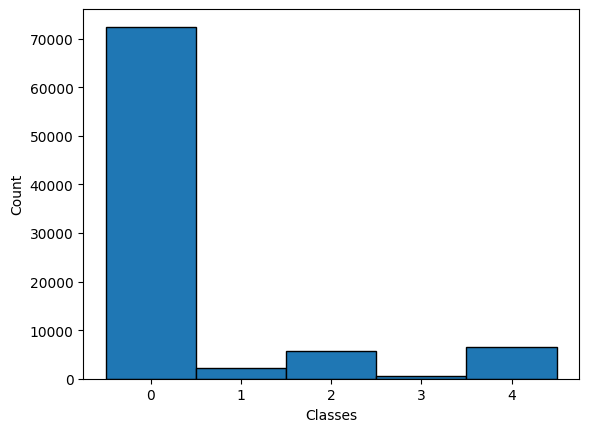

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(y_train, bins=np.arange(min(y_train), max(y_train)+2)-0.5, edgecolor='black')
plt.xlabel("Classes")
plt.ylabel("Count")
plt.xticks(range(len(set(y_train))))
plt.show()

#**4. Train the Model**

In [8]:
from sklearn.ensemble import RandomForestClassifier

def train_model(x_train, y_train):
    model = RandomForestClassifier(n_estimators=100, random_state=1)
    model.fit(x_train, y_train)
    return model

model = train_model(x_train, y_train)

#**5. Evaluate the Model**

Accuracy: 0.9742828430476886
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     18118
         1.0       0.99      0.60      0.74       556
         2.0       0.98      0.88      0.93      1448
         3.0       0.88      0.60      0.71       162
         4.0       1.00      0.94      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.96      0.80      0.87     21892
weighted avg       0.97      0.97      0.97     21892



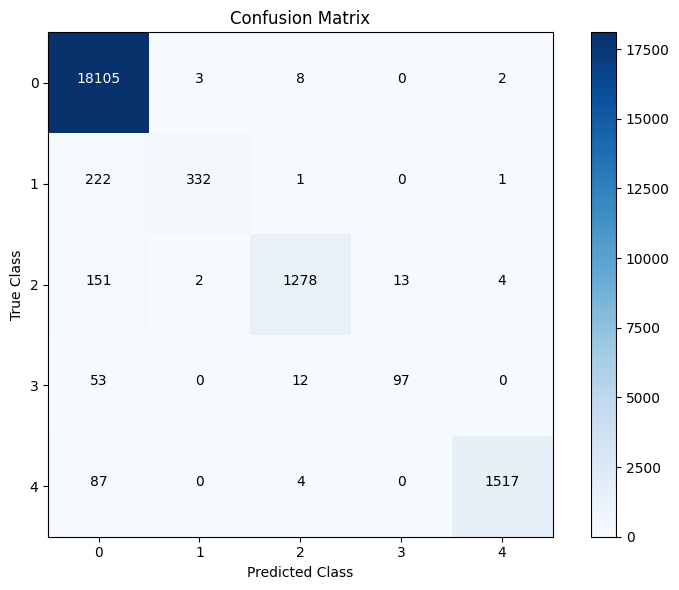

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print(classification_report(y_test, y_pred))
    return y_pred

def plot_confusion_matrix(y_test, y_pred, class_names):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')

    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.show()

y_pred = evaluate_model(model, x_test, y_test)
plot_confusion_matrix(y_test, y_pred, class_names=[0, 1, 2, 3, 4])

⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣴⣿⣿⡷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣴⣿⡿⠋⠈⠻⣮⣳⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣠⣴⣾⡿⠋⠀⠀⠀⠀⠙⣿⣿⣤⣀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣤⣶⣿⡿⠟⠛⠉⠀⠀⠀⠀⠀⠀⠀⠈⠛⠛⠿⠿⣿⣷⣶⣤⣄⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⣴⣾⡿⠟⠋⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠉⠛⠻⠿⣿⣶⣦⣄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⣀⣠⣤⣤⣀⡀⠀⠀⣀⣴⣿⡿⠛⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠛⠿⣿⣷⣦⣄⡀⠀⠀⠀⠀⠀⠀⠀⢀⣀⣤⣄⠀⠀
⢀⣤⣾⡿⠟⠛⠛⢿⣿⣶⣾⣿⠟⠉⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠛⠿⣿⣷⣦⣀⣀⣤⣶⣿⡿⠿⢿⣿⡀⠀
⣿⣿⠏⠀⢰⡆⠀⠀⠉⢿⣿⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⠻⢿⡿⠟⠋⠁⠀⠀⢸⣿⠇⠀
⣿⡟⠀⣀⠈⣀⡀⠒⠃⠀⠙⣿⡆⠀⠀⠀⠀⠀⠀⠀⣀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⣿⠇⠀
⣿⡇⠀⠛⢠⡋⢙⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣾⣿⣿⠄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⣿⠀⠀
⣿⣧⠀⠀⠀⠓⠛⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠛⠋⠀⠀⢸⣧⣤⣤⣶⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢰⣿⡿⠀⠀
⣿⣿⣤⣀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠉⠉⠻⣷⣶⣶⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣿⣿⠁⠀⠀
⠈⠛⠻⠿⢿⣿⣷⣶⣦⣤⣄⣀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣴⣿⣷⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣾⣿⡏⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠉⠙⠛⠻⠿⢿⣿⣷⣶⣦⣤⣄⣀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⠿⠛⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⢿⣿⡄⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠉⠙⠛⠻⠿⢿⣿⣷⣶⣦⣤⣄⣀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢿⣿⡄⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠉⠛⠛⠿⠿⣿⣷⣶⣶⣤⣤⣀⡀⠀⠀⠀⢀⣴⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢿⡿⣄
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠉⠛⠛⠿⠿⣿⣷⣶⡿⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⣿⣹
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⣿⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣀⣀⠀⠀⠀⠀⠀⠀⢸⣧
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢻⣿⣆⠀⠀⠀⠀⠀⠀⢀⣀⣠⣤⣶⣾⣿⣿⣿⣿⣤⣄⣀⡀⠀⠀⠀⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⢿⣻⣷⣶⣾⣿⣿⡿⢯⣛⣛⡋⠁⠀⠀⠉⠙⠛⠛⠿⣿⣿⡷⣶⣿